In [516]:
import pandas as pd
import numpy as np

# Gas Dataset load and data prep

In [517]:
df = pd.read_csv (r'..\\DataSet/2004-2021.tsv', sep = '\t')
isGas = df['PRODUTO']=="GASOLINA COMUM"
df_gas = df[isGas]

# Retirando colunas desnecessárias.
df_gas = df_gas.drop(['PREÇO MÉDIO DISTRIBUIÇÃO',
                      'DESVIO PADRÃO DISTRIBUIÇÃO',
                      'PREÇO MÍNIMO DISTRIBUIÇÃO',
                      'PREÇO MÁXIMO DISTRIBUIÇÃO',
                      'COEF DE VARIAÇÃO DISTRIBUIÇÃO',
                      'DATA FINAL',
                      'PRODUTO',
                      'ESTADO',
                      'DESVIO PADRÃO REVENDA',
                      'PREÇO MÍNIMO REVENDA',
                      'PREÇO MÁXIMO REVENDA',
                      'COEF DE VARIAÇÃO REVENDA'], axis=1)

# Renomeando colunas para o padrão correto.
df_gas.rename(columns = {
    'NÚMERO DE POSTOS PESQUISADOS':'gas_stations_searched',
    'PREÇO MÉDIO REVENDA':'avg_price',
    'DATA INICIAL':'initial_date',
    'REGIÃO':'region',
    'month':'month',
    'ANO':'year'
}, inplace = True)

df_gas['initial_date'] = pd.to_datetime(df_gas['initial_date'], format='%Y-%m-%d')
df_gas['month'] = pd.DatetimeIndex(df_gas['initial_date']).month
df_gas['year'] = pd.DatetimeIndex(df_gas['initial_date']).year
df_gas.head()

,initial_date,region,gas_stations_searched,UNIDADE DE MEDIDA,avg_price,MARGEM MÉDIA REVENDA,month,year
12064,2004-05-09,CENTRO OESTE,128,R$/l,2.029,0.318,5,2004
12065,2004-05-09,CENTRO OESTE,395,R$/l,2.025,0.296,5,2004
12066,2004-05-09,CENTRO OESTE,194,R$/l,2.358,0.472,5,2004
12067,2004-05-09,CENTRO OESTE,166,R$/l,2.120,0.325,5,2004
12068,2004-05-09,NORDESTE,106,R$/l,2.090,0.35,5,2004


In [518]:
# region_centro_oeste = df_gas['region']=="CENTRO OESTE"
# df_gas_centro_oeste = df_gas[region_centro_oeste]
# df_gas_centro_oeste_gp = df_gas_centro_oeste.groupby(by=['year', 'month']).mean()
# #dfGasGroup = dfGasGroup.drop(['month'], axis=1)s
# df_gas_centro_oeste_gp

In [519]:
# region_nordeste = df_gas['region']=="NORDESTE"
# df_gas_nordeste = df_gas[region_nordeste]
# df_gas_nordeste_gp = df_gas_nordeste.groupby(by=['year', 'month', 'region']).mean()
# #dfGasGroup = dfGasGroup.drop(['REGIÃO'], axis=1)
# df_gas_nordeste_gp

In [520]:
# region_sudeste = df_gas['region']=='SUDESTE'
# df_gas_sudeste = df_gas[region_sudeste]
# df_Gas_sudeste_gp = df_gas_sudeste.groupby(by=['year', 'month', 'region']).mean()
# df_Gas_sudeste_gp

In [521]:
# region_sul = df_gas['region']=='SUL'
# df_gas_sul = df_gas[region_sul]
# df_gas_sul_gp = df_gas_sul.groupby(by=['year', 'month', 'region']).mean()
# df_gas_sul_gp

In [522]:
# region_norte = df_gas['region']=='NORTE'
# df_gas_norte = df_gas[region_norte]
# df_gas_norte_gp = df_gas_norte.groupby(by=['year', 'month', 'region']).mean()
# df_gas_norte_gp

# Petroleum Dataset load and data prep

In [523]:
csv_location = '..\\DataSet\Petróleo Brent Futuros Dados Históricos.csv'
dfPetro = pd.read_csv (csv_location)

In [524]:
dfPetro['Data'] = pd.to_datetime(dfPetro['Data'], format='%d.%m.%Y')
dfPetro['month'] = pd.DatetimeIndex(dfPetro['Data']).month
dfPetro['year'] = pd.DatetimeIndex(dfPetro['Data']).year

dfPetro['Último'] = dfPetro['Último'].astype('str')
dfPetro['Último'] = dfPetro['Último'].str.replace(',', '.')
dfPetro['Último'] = pd.to_numeric(dfPetro['Último'], errors='coerce')

dfPetro['Máxima'] = dfPetro['Máxima'].astype('str')
dfPetro['Máxima'] = dfPetro['Máxima'].str.replace(',', '.')
dfPetro['Máxima'] = pd.to_numeric(dfPetro['Máxima'], errors='coerce')

dfPetro['Mínima'] = dfPetro['Mínima'].astype('str')
dfPetro['Mínima'] = dfPetro['Mínima'].str.replace(',', '.')
dfPetro['Mínima'] = pd.to_numeric(dfPetro['Mínima'], errors='coerce')

#dfPetro['Último'] = dfPetro['Último'].astype('str') 
#dfPetro.apply(lambda x: x.str.replace(',','.'))
#dfPetro['Último'] = dfPetro['Último'].astype(float)
#print(dfPetro.dtypes)
#dfPetro

In [525]:
dfPetro

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,month,year
0,2021-12-31,77.78,"78,81",79.68,77.55,"148,96K","-1,94%",12,2021
1,2021-12-30,79.32,"79,19",79.66,78.50,"10,90K","0,11%",12,2021
2,2021-12-29,79.23,"79,28",80.17,78.13,"69,63K","0,37%",12,2021
3,2021-12-28,78.94,"78,67",79.85,78.48,"50,41K","0,43%",12,2021
4,2021-12-27,78.60,"76,32",79.08,75.75,"85,39K","3,23%",12,2021
...,...,...,...,...,...,...,...,...,...
2836,2011-01-07,93.33,"94,38",94.58,92.59,"165,97K","-1,26%",1,2011
2837,2011-01-06,94.52,"95,70",96.12,94.01,"217,45K","-1,03%",1,2011
2838,2011-01-05,95.50,"93,35",95.86,92.37,"212,40K","2,11%",1,2011
2839,2011-01-04,93.53,"94,92",95.74,92.58,"184,63K","-1,38%",1,2011


In [526]:
dfPeroGroup

Último      Máxima      Mínima
ANO  MES                                    
2011 1     96.907143   97.820000   95.683333
     2    104.032000  105.879500  102.623000
     3    114.671739  116.022174  112.994783
     4    123.090500  124.113500  121.427500
     5    114.521818  116.437727  112.329091
...              ...         ...         ...
2021 8     70.513636   71.452273   69.298182
     9     74.876364   75.545455   73.793636
     10    83.746190   84.491429   82.534762
     11    80.849545   82.559091   79.667273
     12    74.803913   75.947826   73.372174

[132 rows x 3 columns]

# Geração de graficos

In [527]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='ANO,MES'>

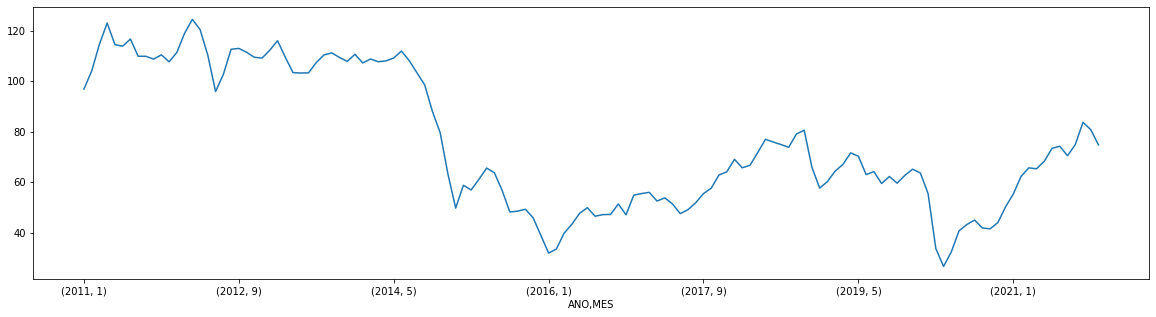

In [528]:
dfPeroGroup['Último'].plot(figsize=(20,5))

<AxesSubplot:xlabel='year,month'>

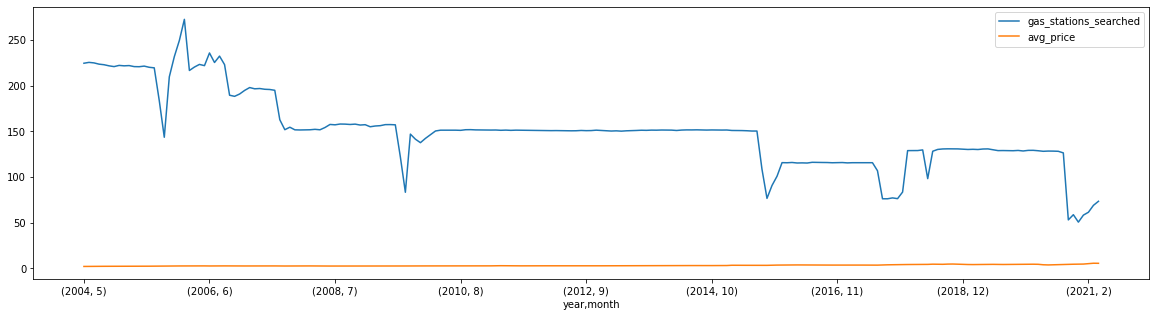

In [529]:
df_gas_centro_oeste_gp  .plot(figsize=(20,5))

In [530]:
# df_gas_norte_gp.plot(figsize=(20,5))

In [531]:
# df_gas_sul_gp.plot(figsize=(20,5))

In [532]:
# df_Gas_sudeste_gp.plot(figsize=(20,5))

# Insight 1

In [533]:
df_gas_d1 = df_gas.drop(['region','gas_stations_searched', 'UNIDADE DE MEDIDA','MARGEM MÉDIA REVENDA'], axis=1)
df_gas_d1['semestre'] = np.where(df_gas_d1['month'] < 7, 1, 2)
#df_gas_d1 = df_gas_d1.groupby(by=['year', 'semestre']).mean()
#df_gas_d1 = df_gas_d1.drop('month', axis=1)
#df_gas_d1 = df_gas_d1.sort_values(by=['year', 'semestre'], ascending=True)
df_gas_d1 = df_gas_d1.reset_index(drop=True)
df_mask=df_gas_d1['year']>2010
df_gas_d1 = df_gas_d1[df_mask]

df_gas_d1

,initial_date,avg_price,month,year,semestre
9260,2011-01-02,2.774,1,2011,1
9261,2011-01-02,2.686,1,2011,1
9262,2011-01-02,2.806,1,2011,1
9263,2011-01-02,2.678,1,2011,1
9264,2011-01-02,2.805,1,2011,1
...,...,...,...,...,...
23565,2021-04-25,5.364,4,2021,1
23566,2021-04-25,5.051,4,2021,1
23567,2021-04-25,5.265,4,2021,1
23568,2021-04-25,5.586,4,2021,1


In [534]:

dfPetro['PrecoMedio'] = ((dfPetro['Máxima'] + dfPetro['Mínima'])/2)/158.98722
dfPetro_d1 = dfPetro.drop(['Último','Abertura', 'Máxima','Mínima','Vol.', 'Var%'], axis=1)
dfPetro_d1['semestre'] = np.where(dfPetro_d1['month'] < 7, 1, 2)
#dfPetro_d1.insert(2, "avg_price", df_gas_d1['avg_price'], allow_duplicates=False)
dfPetro_d1 = dfPetro_d1.drop('month', axis=1)


#dfPetro_d1 = dfPetro_d1.groupby(by=['year', 'semestre']).mean()

#dfPetro_d1 = dfPetro_d1.sort_values(['year', 'semestre'], ascending=False)
dfPetro_d1 = dfPetro_d1.reset_index(drop=False)
dfPetro_d1
# dfPetro_d1.filter(['ANO','semestre','PrecoMedio'])\
#     .groupby(['ANO', 'semestre']).mean()\
#     .sort_values(['ANO', 'semestre'], ascending=True)\
#     .plot()


,index,Data,year,PrecoMedio,semestre
0,0,2021-12-31,2021,0.494474,2
1,1,2021-12-30,2021,0.497398,2
2,2,2021-12-29,2021,0.497839,2
3,3,2021-12-28,2021,0.497933,2
4,4,2021-12-27,2021,0.486926,2
...,...,...,...,...,...
2836,2836,2011-01-07,2011,0.588632,1
2837,2837,2011-01-06,2011,0.597941,1
2838,2838,2011-01-05,2011,0.591966,1
2839,2839,2011-01-04,2011,0.592249,1


In [535]:
result

,initial_date,avg_price,month,year,semestre,index,Data,PrecoMedio
0,2011-01-02,2.774,1.0,2011,1,2713,2011-06-30,0.704333
1,2011-01-02,2.774,1.0,2011,1,2714,2011-06-29,0.694301
2,2011-01-02,2.774,1.0,2011,1,2715,2011-06-28,0.674268
3,2011-01-02,2.774,1.0,2011,1,2716,2011-06-27,0.657348
4,2011-01-02,2.774,1.0,2011,1,2717,2011-06-24,0.667727
...,...,...,...,...,...,...,...,...
1846198,NaT,NaN,NaN,2021,2,127,2021-07-07,0.467302
1846199,NaT,NaN,NaN,2021,2,128,2021-07-06,0.477931
1846200,NaT,NaN,NaN,2021,2,129,2021-07-05,0.481045
1846201,NaT,NaN,NaN,2021,2,130,2021-07-02,0.476894


[(0.0, 21.0), Text(0.5, 0, 'Total Revenue'), Text(0, 0.5, 'Company')]

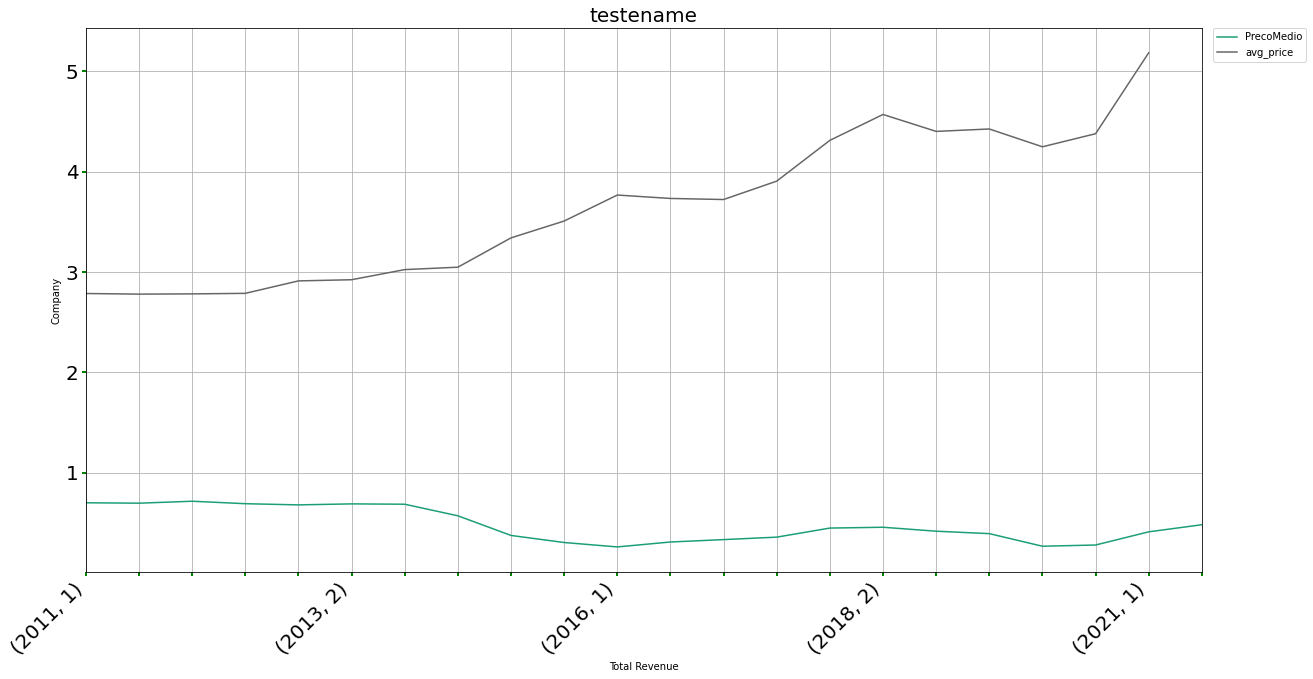

In [660]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)# frames = [df_gas_d1, dfPetro_d1]
#result = pd.concat([df_gas_d1, dfPetro_d1], axis=1, join='inner')
result = pd.merge(df_gas_d1, dfPetro_d1, how = 'outer', on = ['year', 'semestre'])
#result = result.sort_values(['year', 'semestre'], ascending=False)
#fig, ax = plt.subplots(figsize=(20,10))
#plt.suptitle("testename")
ax = result.filter(['year','semestre','PrecoMedio', 'avg_price'])\
    .groupby(['year', 'semestre']).mean()\
    .sort_values(['year', 'semestre'], ascending=True)\
    .plot(figsize=(20,10), fontsize=20, grid=True, colormap = 'Dark2')

ax.set_title("testename", fontsize=20)
ax.legend(bbox_to_anchor = (1.01, 1), loc='upper left', borderaxespad=0.)

#ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_minor_locator(MultipleLocator())
ax.xaxis.set_major_locator(MultipleLocator())
ax.tick_params(which='both', width=2, color='b')
ax.tick_params(which='major', length=4, color='g')
ax.tick_params(which='minor', length=6, color='r')

labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 21], xlabel='Total Revenue', ylabel='Company')
#ax.set_xticks([0, 2, 5, 10, 15, 20, 25])

#labels[1] = 0
#ax.set_xticklabels(labels)

In [665]:

# for i in result['year']:
#     print(i)
    
labels = [item.get_text() for item in ax.get_xticklabels()]
print(type(labels[0]))

# labels
ax.get

<class 'str'>


C:\Users\chris\AppData\Local\Temp\ipykernel_2072\1622811777.py:8: MatplotlibDeprecationWarning: 
The numCols attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use get_gridspec().ncols instead.
  ax.numCols()


TypeError: 'int' object is not callable